In [1]:
#########################################################################
# Imports
#########################################################################
import os
from ultralytics import YOLO
import hyperparams as hp
from utils import setup_dirs, split_dataset, eda_distribution, eda_samples, eda_average_image, eda_brightness, eval_training_curves, eval_validate_model, eval_visual_predictions

In [2]:
#########################################################################
# Preperation
#
#########################################################################
# Don't execute this cell unless you already have the dataset downloaded, and don't mind it being re-organized.

# Setup directories
setup_dirs()
# Split dataset into train and val
split_dataset()

Refreshing final dataset directory: c:\Users\YuriM\Desktop\Projects\SpaghettiNet_3D-printer-spaghetti-detection\datasets\classification\final
Created: c:\Users\YuriM\Desktop\Projects\SpaghettiNet_3D-printer-spaghetti-detection\datasets\classification\final\train\clean
Created: c:\Users\YuriM\Desktop\Projects\SpaghettiNet_3D-printer-spaghetti-detection\datasets\classification\final\train\spaghetti
Created: c:\Users\YuriM\Desktop\Projects\SpaghettiNet_3D-printer-spaghetti-detection\datasets\classification\final\val\clean
Created: c:\Users\YuriM\Desktop\Projects\SpaghettiNet_3D-printer-spaghetti-detection\datasets\classification\final\val\spaghetti
Processing 'clean': 810 Train, 203 Val
Processing 'spaghetti': 192 Train, 49 Val


Generating Class Distribution Plots...


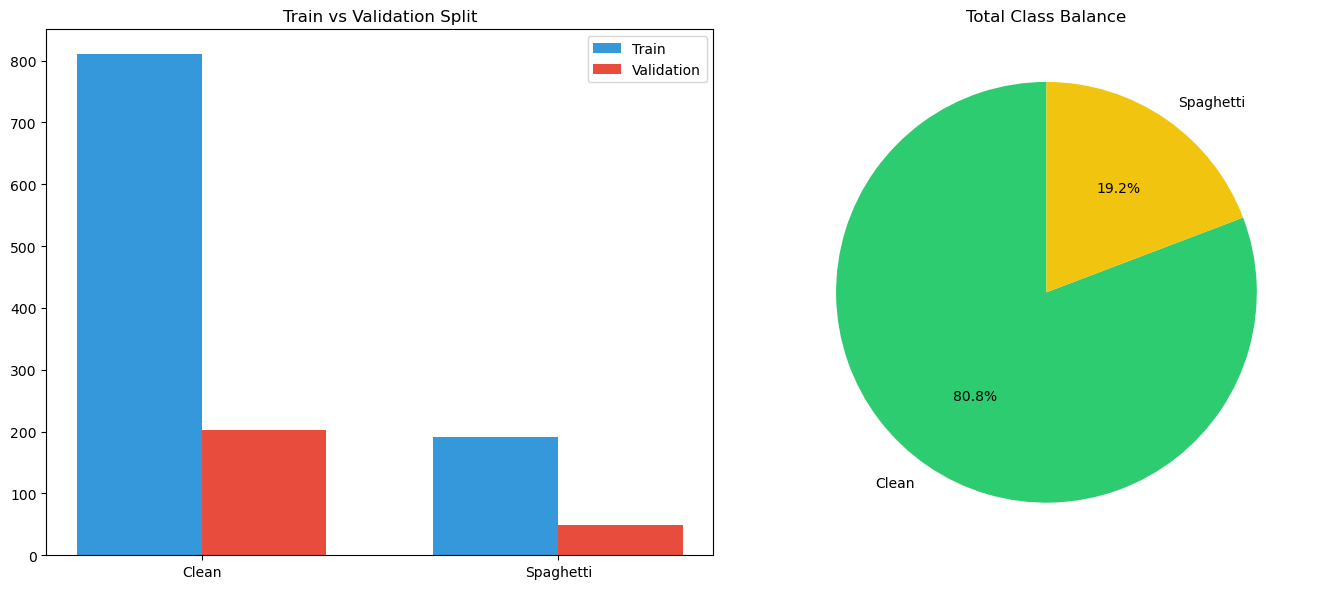

Showing 5 random samples per class from training set...


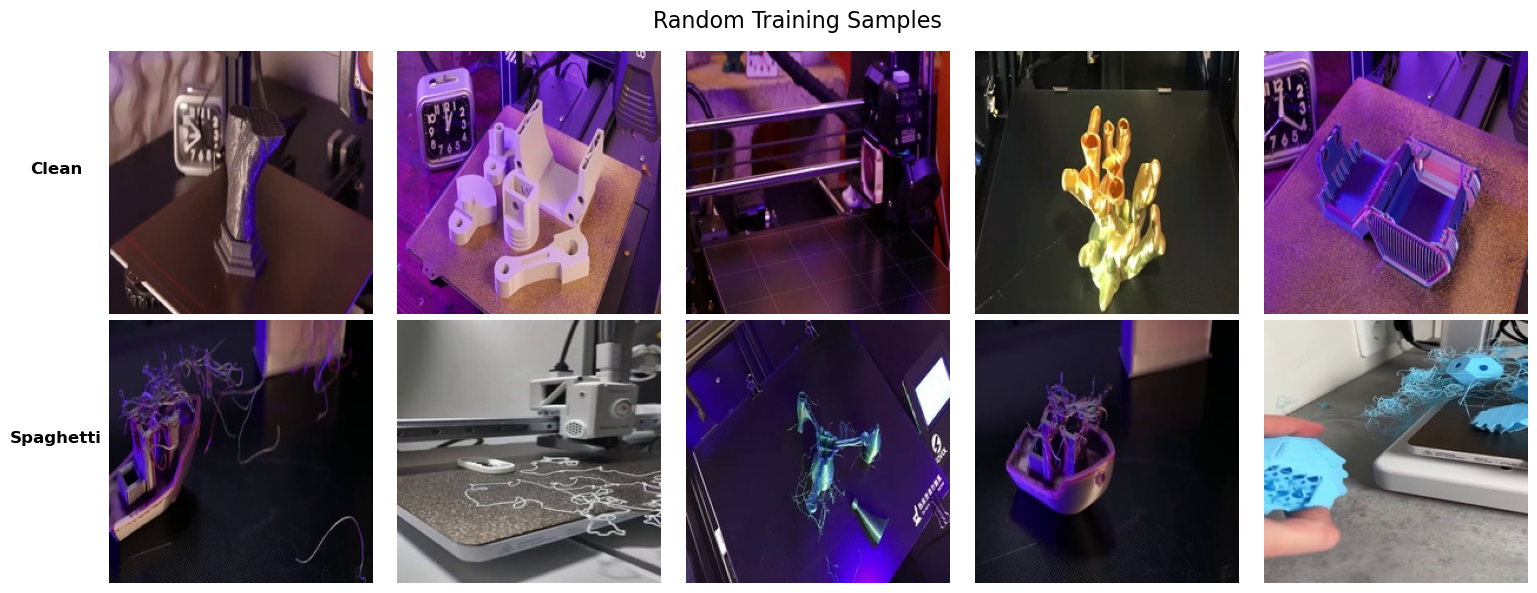

Generating Average (Mean) Image analysis...


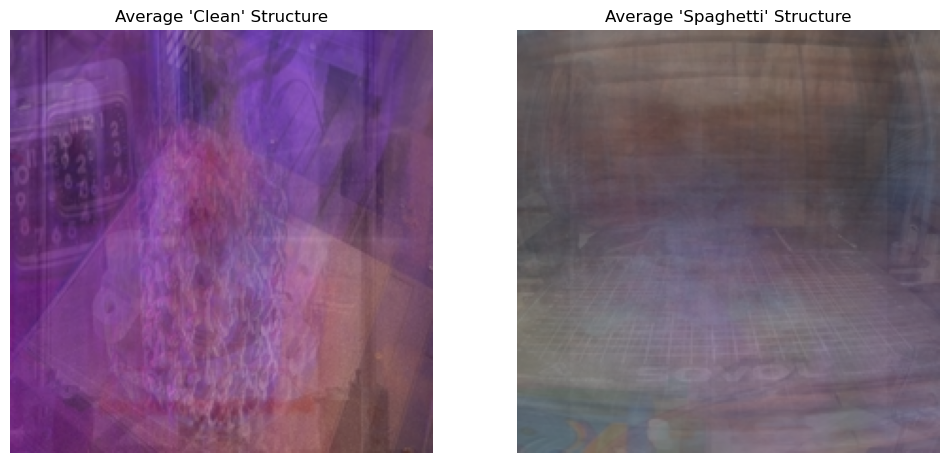

Calculating brightness distribution...


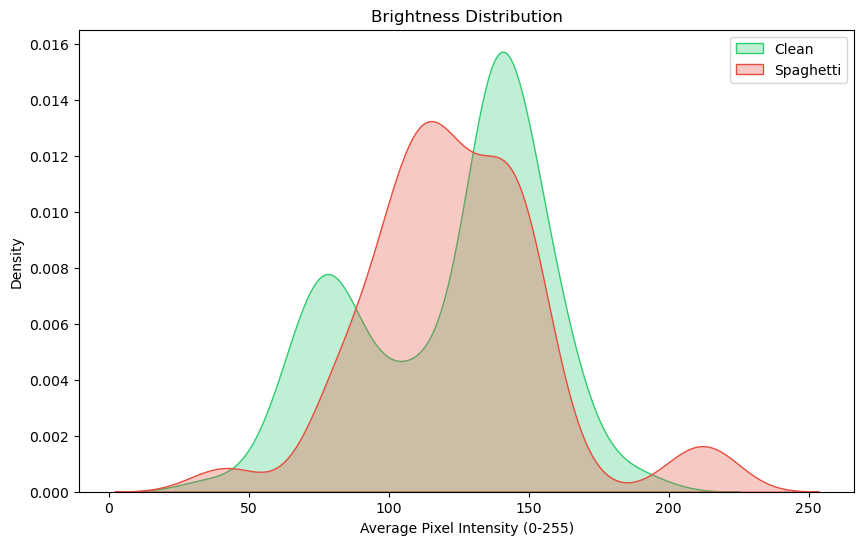

In [3]:
#########################################################################
# Exploratory Data Analysis (EDA)
#########################################################################

# 1. Check for Class Imbalance
# Necessary because if one class (e.g., 'clean') has 90% of the data, 
# the model might cheat by always guessing 'clean' without actually learning anything.
eda_distribution()

# 2. visual Sanity Check
# Necessary to verify that the images were loaded correctly, are not corrupt, 
# and that 'spaghetti' actually looks like print failures before we waste time training.
eda_samples(num_samples=5)

# 3. Analyze Structural Consistency (The "Ghost" Image)
# Necessary to see if 'clean' prints share a common shape (creating a ghost-like average)
# versus 'spaghetti' which should be chaotic. If both look like gray blobs, the model will struggle.
eda_average_image()

# 4. Check for Environmental Bias (Lighting)
# Necessary to ensure the model isn't just learning that "dark images = spaghetti" 
# (e.g., if you only print spaghetti at night). We want it to learn the shape, not the brightness.
eda_brightness()

In [ ]:
#########################################################################
#   Yolo26 finetuning training
#########################################################################

print(f"Loading model with weights at: {hp.PATH_WEIGHTS_YOLO}")
model = YOLO(hp.PATH_WEIGHTS_YOLO)
print(f"Model loaded: {model}")
    
results = model.train(
    data=hp.PATH_FINAL_DATASET, 
    epochs=hp.EPOCHS,
    imgsz=hp.IMG_SIZE,
    batch=hp.BATCH_SIZE,
    project=hp.PATH_BASE,
    name=hp.FINAL_WEIGHTS_NAME,
    exist_ok=True               # Overwrite existing results, if any
)
    
print("Training complete.")

In [ ]:
##########################################################################
#  Evaluation
##########################################################################
print("Starting evaluation...")

# Did we learn? (Training Curves)
# Look for: Validation loss (Orange) decreasing alongside Train loss (Blue).
# If Val loss goes UP while Train loss goes DOWN, you are Overfitting.
eval_training_curves()

# Official Metrics
# This runs the model against the full validation set to get the exact % accuracy.
metrics = eval_validate_model()

# Show actual images with their predictions. 
# Green Text = Correct, Red Text = Wrong.
# Look for: High confidence (>90%) on correct predictions.
eval_visual_predictions(num_samples=6)